In [1]:
import numpy as np
import skfda
from skfda.exploratory.fpca import FPCABasis, FPCADiscretized
from skfda.representation import FDataBasis, FDataGrid
from skfda.datasets._real_datasets import fetch_growth, fetch_weather
from matplotlib import pyplot
from skfda.representation.basis import Fourier, BSpline
from sklearn.decomposition import PCA

In [2]:
def fetch_weather_temp_only():
    weather_dataset = fetch_weather()
    fd_data = weather_dataset['data']
    fd_data.data_matrix = fd_data.data_matrix[:, :, :1]
    fd_data.axes_labels = fd_data.axes_labels[:-1]
    return fd_data

# Finding lambda

FDataBasis(
    _basis=Fourier(domain_range=[[  1 365]], n_basis=9, period=364),
    coefficients=[[-0.92321326 -0.14305151 -0.35426565 -0.00898117  0.02415526  0.02912168
       0.0017787   0.0105183   0.00913199]
     [-0.33139612 -0.03518506  0.89267801  0.17537891  0.24018427  0.03852789
       0.03756656 -0.02437487  0.01133841]])
[15086.27662761  1438.98606096]


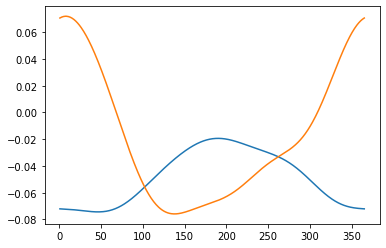

In [3]:
fd_data = fetch_weather_temp_only()
# fd_data = FDataGrid(np.squeeze(fd_data.data_matrix), np.arange(0.5, 365, 1))
basis = skfda.representation.basis.Fourier(n_basis=9)
fd_basis = fd_data.to_basis(basis)
fpca = FPCABasis(2)
fpca.fit(fd_basis)
fpca.components.plot()
print(fpca.components)
print(fpca.component_values)
pyplot.show()

In [4]:
fd_data.norm()

AttributeError: 'FDataGrid' object has no attribute 'norm'

In [14]:
fpca.components.derivative(2).inner_product(fpca.components.derivative(2)) \
    + fpca.components.inner_product(fpca.components)

array([[ 1.00000002e+00, -1.65502423e-08],
       [-1.65502423e-08,  1.00000023e+00]])

In [15]:
fpca.components.inner_product(fpca.components)

array([[1.00000000e+00, 1.38777878e-16],
       [1.38777878e-16, 1.00000000e+00]])

FDataBasis(
    _basis=Fourier(domain_range=[[  1 365]], n_basis=9, period=364),
    coefficients=[[-0.92413848 -0.14193772 -0.35129594 -0.00785487  0.02119231  0.01694925
       0.00103464  0.00321583  0.00279164]
     [-0.33303402 -0.03547108  0.89500958  0.15396134  0.21074998  0.02212515
       0.02173688 -0.00739345  0.00334435]])
[15058.25775083  1410.7365378 ]


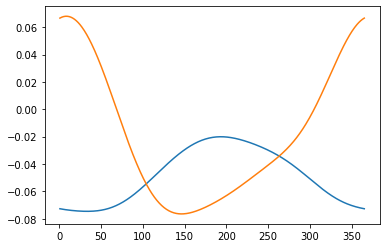

In [23]:
fd_data = fetch_weather_temp_only()
# fd_data = FDataGrid(np.squeeze(fd_data.data_matrix), np.arange(0.5, 365, 1))
basis = skfda.representation.basis.Fourier(n_basis=9)
fd_basis = fd_data.to_basis(basis)
fpca = FPCABasis(2, regularization=True, regularization_parameter=100000)
fpca.fit(fd_basis)
fpca.components.plot()
print(fpca.components)
print(fpca.component_values)
pyplot.show()

In [33]:
derived=fpca.components.derivative(2)
derived.inner_product(derived)

array([[ 1.59561036e-08, -2.03098938e-08],
       [-2.03098938e-08,  1.76404890e-07]])

In [69]:
in_prod = fpca.components.inner_product(fpca.components)
in_prod

array([[0.99840439, 0.00203099],
       [0.00203099, 0.98235951]])

In [37]:
in_prod + derived.inner_product(derived) * 100000

array([[ 1.00000000e+00, -9.84455573e-17],
       [-9.84455573e-17,  9.99999997e-01]])

In [72]:
# TODO, analisis de los productos internos, donde se usa uno de puede usar el otro

In [30]:
basis_fd=FDataBasis(skfda.representation.basis.Fourier(n_basis=3), 
                    [[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])
fpca_basis = FPCABasis(2, regularization=True, regularization_parameter=0.0001)
fpca_basis = fpca_basis.fit(basis_fd)
fpca_basis.components.coefficients
fpca_basis.components.inner_product(fpca_basis.components)


array([[ 0.86681336, -0.00793026],
       [-0.00793026,  0.90321547]])

In [32]:
derived = fpca_basis.components.derivative(2)
derived.inner_product(derived)*0.0001

array([[0.13318664, 0.00793026],
       [0.00793026, 0.09678453]])

# Test convert to basis

In [64]:
fd_data = fetch_weather_temp_only()
# fd_data = FDataGrid(np.squeeze(fd_data.data_matrix), np.arange(0.5, 365, 1))
basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=[0,365])
fd_basis = fd_data.to_basis(basis)
fd_basis

FDataBasis(
    basis=Fourier(domain_range=[array([  0, 365])], n_basis=9, period=365),
    coefficients=[[ 8.95997071e+01 -7.56653047e+01 -1.14531869e+02  5.60410553e+00
       4.13831672e+00 -8.81388351e+00 -1.28702668e+00  3.22313889e+00
       8.27705008e-01]
     [ 1.17492968e+02 -7.70327394e+01 -1.49082796e+02 -1.14875790e+00
      -1.07468747e+00 -7.91124972e+00 -2.74298661e+00  9.71720938e-01
      -1.14509808e+00]
     [ 1.05260551e+02 -8.63332550e+01 -1.36356388e+02  6.04906258e-01
       4.43809965e+00 -1.05423840e+01 -9.23182460e-01  1.52557219e+00
       4.89740559e-01]
     [ 1.30133656e+02 -6.70355028e+01 -1.18479289e+02 -2.59667770e+00
      -3.87697018e+00 -5.89304221e+00 -5.60514578e-01  5.70029306e-01
      -1.48240258e+00]
     [ 9.99635007e+01 -8.52358795e+01 -1.58197694e+02 -4.34606119e+00
      -3.87220304e-01 -9.62818845e+00 -3.32913142e+00  1.23294045e+00
      -8.83919777e-01]
     [ 1.00549736e+02 -7.17801965e+01 -1.81015491e+02 -7.39885098e+00
      -6.50588

In [68]:
basis = skfda.representation.basis.Fourier(n_basis=3, domain_range=[0,365])
np.transpose(basis.evaluate(range(1, 4)))

array([[0.05234239, 0.00127419, 0.07401235],
       [0.05234239, 0.002548  , 0.07397945],
       [0.05234239, 0.00382106, 0.07392463]])

In [5]:
print(fd_basis.coefficients)

[[ 8.99091291e+01 -7.66543475e+01 -1.13583421e+02  5.44231094e+00
   3.83515561e+00 -8.99363959e+00 -1.11826010e+00  3.07572675e+00
   6.80630538e-01]
 [ 1.17931874e+02 -7.82957088e+01 -1.47967475e+02 -1.40972969e+00
  -1.27977838e+00 -8.16916942e+00 -2.61402567e+00  7.08222777e-01
  -1.24141020e+00]
 [ 1.05632931e+02 -8.74878381e+01 -1.35256374e+02  4.21625041e-01
   4.18065075e+00 -1.07611638e+01 -7.20116154e-01  1.29607751e+00
   3.91548980e-01]
 [ 1.30439990e+02 -6.80334034e+01 -1.17526982e+02 -2.87963231e+00
  -4.01337903e+00 -6.07850424e+00 -4.78848992e-01  3.29481412e-01
  -1.54310715e+00]
 [ 1.00460999e+02 -8.65606083e+01 -1.56988474e+02 -4.61115777e+00
  -5.51072768e-01 -9.93526704e+00 -3.15969917e+00  9.49508717e-01
  -9.97171826e-01]
 [ 1.01173394e+02 -7.32943258e+01 -1.79791141e+02 -7.73015377e+00
  -6.60778450e+00 -9.47478355e+00 -5.53686046e+00  1.23002295e+00
  -2.70796419e+00]
 [-9.55872354e+01 -1.01811346e+02 -2.18714716e+02 -9.95819769e+00
  -7.83046219e+00 -8.7905389

In [44]:
fd_data = fetch_weather_temp_only()
# fd_data = FDataGrid(np.squeeze(fd_data.data_matrix), np.arange(0.5, 365, 1))
basis = skfda.representation.basis.Monomial(n_basis=3)
fd_basis = fd_data.to_basis(basis)


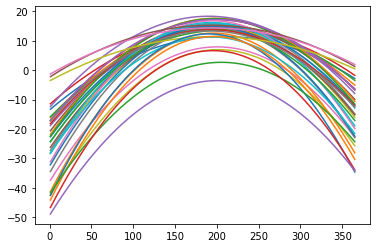

In [45]:
fd_basis.plot()
pyplot.show()

In [50]:
basis.evaluate(list(range(10)))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.]])

In [60]:
fourier_basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=[0, 365])
np.transpose(fourier_basis.evaluate(range(4)))

array([[0.05234239, 0.        , 0.07402332, 0.        , 0.07402332,
        0.        , 0.07402332, 0.        , 0.07402332],
       [0.05234239, 0.00127419, 0.07401235, 0.002548  , 0.07397945,
        0.00382106, 0.07392463, 0.00509298, 0.07384791],
       [0.05234239, 0.002548  , 0.07397945, 0.00509298, 0.07384791,
        0.00763193, 0.07362884, 0.01016183, 0.0733225 ],
       [0.05234239, 0.00382106, 0.07392463, 0.00763193, 0.07362884,
        0.01142245, 0.07313672, 0.01518252, 0.07244959]])

## Test convert to basis

In [73]:
fd_data = fetch_weather_temp_only()
fd_data = FDataGrid(np.squeeze(fd_data.data_matrix), np.arange(0.5, 365, 1))

FDataGrid(
    array([[[ -3.6],
            [ -3.1],
            [ -3.4],
            ...,
            [ -3.2],
            [ -2.8],
            [ -4.2]],
    
           [[ -4.4],
            [ -4.2],
            [ -5.3],
            ...,
            [ -3.6],
            [ -4.9],
            [ -5.7]],
    
           [[ -3.8],
            [ -3.5],
            [ -4.6],
            ...,
            [ -3.4],
            [ -3.3],
            [ -4.8]],
    
           ...,
    
           [[-23.3],
            [-24. ],
            [-24.4],
            ...,
            [-23.5],
            [-23.9],
            [-24.5]],
    
           [[-26.3],
            [-27.1],
            [-27.8],
            ...,
            [-25.7],
            [-24. ],
            [-24.8]],
    
           [[-30.7],
            [-30.6],
            [-31.4],
            ...,
            [-29. ],
            [-29.4],
            [-30.5]]]),
    sample_points=[array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   

# Test with Ramsay version

In [20]:
basis_fd=FDataBasis(skfda.representation.basis.Fourier(n_basis=3), 
                    [[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])
fpca_basis = FPCABasis(2)
fpca_basis = fpca_basis.fit(basis_fd)
fpca_basis.components.coefficients
# np.linalg.norm(fpca_basis.components.coefficients[0])

array([[-0.10101525, -0.40406102,  0.90913729],
       [ 0.50507627, -0.80812204, -0.30304576]])

In [40]:
basis_fd=FDataBasis(skfda.representation.basis.Fourier(n_basis=3), 
                    [[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])
fpca_basis = FPCABasis(2, regularization=True, regularization_parameter=0.0001)
fpca_basis = fpca_basis.fit(basis_fd)
fpca_basis.components.coefficients
fpca_basis.components.inner_product(fpca_basis.components)

array([[ 0.86681336, -0.00793026],
       [-0.00793026,  0.90321547]])

In [14]:
basis_fd=FDataBasis(skfda.representation.basis.Fourier(n_basis=3), 
                    [[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])
fpca_basis = FPCABasis(2)
fpca_basis = fpca_basis.fit(basis_fd)
fpca_basis.components.coefficients

array([[-0.10101525, -0.40406102,  0.90913729],
       [ 0.50507627, -0.80812204, -0.30304576]])

In [15]:
fpca_basis.transform(basis_fd)

array([[-0.70710678,  1.1785113 ],
       [-1.41421356, -0.94280904],
       [ 2.12132034, -0.23570226]])

## BSpline test with Ramsays version

In [39]:
basis_fd=FDataBasis(skfda.representation.basis.BSpline(n_basis=4), 
                    [[1.0, 0.0, 0.0, 0.0], [0.0, 2.0, 0.0, 0.0], [0.0, 0.0, 3.0, 0.0], [1.0, 0.0, 0.0, 1.0]])
fpca_basis = FPCABasis(2)
fpca_basis = fpca_basis.fit(basis_fd)
fpca_basis.components.coefficients
fpca_basis.components.inner_product(fpca_basis.components)

array([[ 1.00000000e+00, -4.30211422e-16],
       [-4.30211422e-16,  1.00000000e+00]])

In [33]:
fpca_basis.component_values

array([0.09991746, 0.02828496])

In [35]:
X = FDataBasis(skfda.representation.basis.BSpline(n_basis=4), 
                    [[1.0, 0.0, 0.0, 0.0], [0.0, 2.0, 0.0, 0.0], [0.0, 0.0, 3.0, 0.0], [1.0, 0.0, 0.0, 1.0]])
meanfd = X.mean()
# consider moving these lines to FDataBasis as a centering function
# subtract from each row the mean coefficient matrix
X.coefficients -= meanfd.coefficients
n_samples, n_basis = X.coefficients.shape
components_basis = X.basis.copy()
g_matrix = components_basis.gram_matrix()
j_matrix = g_matrix

In [41]:
components_basis.penalty(derivative_degree=0)

array([[0.14285714, 0.07142857, 0.02857143, 0.00714286],
       [0.07142857, 0.08571429, 0.06428571, 0.02857143],
       [0.02857143, 0.06428571, 0.08571429, 0.07142857],
       [0.00714286, 0.02857143, 0.07142857, 0.14285714]])

In [36]:
j_matrix

array([[0.14285714, 0.07142857, 0.02857143, 0.00714286],
       [0.07142857, 0.08571429, 0.06428571, 0.02857143],
       [0.02857143, 0.06428571, 0.08571429, 0.07142857],
       [0.00714286, 0.02857143, 0.07142857, 0.14285714]])

In [18]:
print(basis_fd)

FDataBasis(
    _basis=Fourier(domain_range=[array([0, 1])], n_basis=3, period=1),
    coefficients=[[1. 0. 0.]
     [0. 2. 0.]
     [0. 0. 3.]])


# test penalty

AttributeError: 'FDataBasis' object has no attribute 'penalty'

In [22]:
data_matrix = np.array([[1.0, 0.0], [0.0, 2.0]])
sample_points = [0, 1]
fd = FDataGrid(data_matrix, sample_points)
fd

FDataGrid(
    array([[[1.],
            [0.]],
    
           [[0.],
            [2.]]]),
    sample_points=[array([0, 1])],
    domain_range=array([[0, 1]]),
    dataset_label=None,
    axes_labels=None,
    extrapolation=None,
    interpolator=SplineInterpolator(interpolation_order=1, smoothness_parameter=0.0, monotone=False),
    keepdims=False)

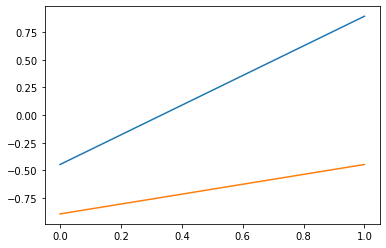

In [30]:
fpca_discretized = FPCADiscretized(2)
fpca_discretized.fit(fd)
fpca_discretized.components.plot()
pyplot.show()

In [31]:
fpca_discretized.transform(fd)

array([[-1.11803399e+00,  5.55111512e-17],
       [ 1.11803399e+00, -5.55111512e-17]])

In [26]:
fpca_discretized.weights

array([0.5, 0.5])

In [17]:
mean = fd.mean()
np.squeeze(mean.data_matrix)

array([0.5, 1. ])

In [2]:
basis = skfda.representation.basis.Fourier(n_basis=8)

In [4]:
print(basis.gram_matrix())

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


We use the Berkeley Growth Study data for the purpose of illustrating how functional principal component analysis works

In [2]:
dataset = fetch_growth()
fd = dataset['data']
y = dataset['target']

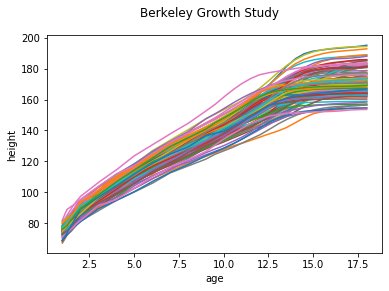

In [3]:
fd.plot()
pyplot.show()

Trapezoidal rule implementation

In [20]:
differences = np.diff(fd.sample_points[0])
differences

array([0.25, 0.25, 0.25, 0.25, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

In [21]:
weights = [sum(differences[i:i+2])/2 for i in range(len(differences))]
weights = np.concatenate(([differences[0]/2], weights))

In [22]:
print(weights)
print(len(weights))
len(fd.sample_points[0])

[0.125 0.25  0.25  0.25  0.625 1.    1.    1.    1.    1.    0.75  0.5
 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5
 0.5   0.5   0.5   0.5   0.5   0.5   0.25 ]
31


31

In [53]:
pca = PCA(n_components=3)
X = fd

In [55]:
fd_data = np.squeeze(X.data_matrix)

# obtain the number of samples and the number of points of descretization
n_samples, n_points_discretization = fd_data.shape

# establish weights for each point of discretization

differences = np.diff(X.sample_points[0])
weights = [sum(differences[i:i + 2]) / 2 for i in range(len(differences))]
weights = np.concatenate(([differences[0] / 2], weights))

weights_matrix = np.diag(weights)

# k_estimated is not used for the moment
# k_estimated = fd_data @ np.transpose(fd_data) / n_samples

final_matrix = fd_data @ np.sqrt(weights_matrix) / np.sqrt(n_samples)
pca.fit(final_matrix)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_**2)

[0.80909337 0.13558824 0.03007623]
[556.70338211  93.29260943  20.69419605]


In [60]:
print(fpca_discretized.component_values)

[5.56703382e+02 9.32926094e+01 2.06941960e+01 7.95971044e+00
 3.27921407e+00 1.63523090e+00 1.22838546e+00 9.73332991e-01
 6.08593043e-01 4.71369155e-01 2.76283031e-01 2.30928799e-01
 1.79929441e-01 1.44663882e-01 1.08128943e-01 7.56538588e-02
 5.77942488e-02 3.72920097e-02 2.25537373e-02 2.14987022e-02
 1.38201173e-02 1.04725970e-02 8.95085752e-03 6.64736303e-03
 4.35340335e-03 3.66370099e-03 3.06892355e-03 2.33855881e-03
 1.85705280e-03 1.44638559e-03 9.00478177e-04]


In [1]:
FDataGrid


NameError: name 'FDataGrid' is not defined

In this case, we do not transform the data to a certain basis. We analyse the functional principal components using the discretized data. Observe that there are abrupt changes in the principal components

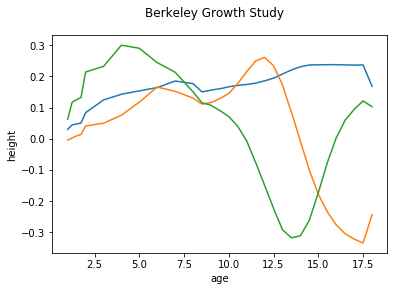

Data set:    [[[ 0.0301562 ]
  [ 0.04427131]
  [ 0.04728343]
  [ 0.05024498]
  [ 0.08350374]
  [ 0.12469084]
  [ 0.1428609 ]
  [ 0.15392606]
  [ 0.16414784]
  [ 0.185423  ]
  [ 0.17731185]
  [ 0.15056585]
  [ 0.1562045 ]
  [ 0.16035723]
  [ 0.16710323]
  [ 0.17146745]
  [ 0.17403676]
  [ 0.17857486]
  [ 0.18564754]
  [ 0.19469669]
  [ 0.2076448 ]
  [ 0.22112651]
  [ 0.23137277]
  [ 0.2370328 ]
  [ 0.23762522]
  [ 0.23844513]
  [ 0.23774772]
  [ 0.23691089]
  [ 0.23653888]
  [ 0.23718893]
  [ 0.16855265]]

 [[-0.00444331]
  [ 0.00268314]
  [ 0.00915844]
  [ 0.01355168]
  [ 0.04096133]
  [ 0.04974792]
  [ 0.07535919]
  [ 0.11740248]
  [ 0.16609379]
  [ 0.15244813]
  [ 0.13069387]
  [ 0.11127231]
  [ 0.11601948]
  [ 0.12865819]
  [ 0.14523707]
  [ 0.17744913]
  [ 0.21594727]
  [ 0.24988589]
  [ 0.26144481]
  [ 0.23456892]
  [ 0.17285918]
  [ 0.08524828]
  [-0.00841461]
  [-0.10122569]
  [-0.17851914]
  [-0.23488654]
  [-0.27708391]
  [-0.30554775]
  [-0.32274581]
  [-0.33517072]
  [-0.244

In [4]:
fpca_discretized = FPCADiscretized()
fpca_discretized.fit(fd)
fpca_discretized.components.plot()
pyplot.show()
print(fpca_discretized.components)
print(fpca_discretized.component_values)

we can choose to use eigenvalue and eigenvector analysis rather than using singular value decomposition, which is the default behaviour. Please note that it is more efficient to use svd

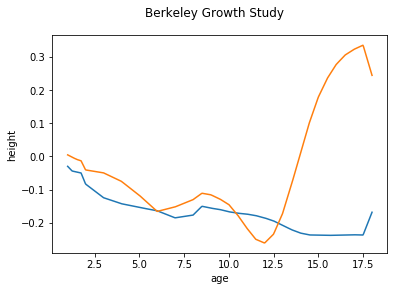

In [51]:
fpca_discretized = FPCADiscretized()
fpca_discretized.fit(fd)
fpca_discretized.components.plot()
pyplot.show()

In [6]:
scores = fpca_discretized.transform(fd)
print(scores)

[[-75.06492745 -18.81698461]
 [  7.70436341 -12.11485069]
 [ 24.47538324 -18.13755002]
 [-15.367826   -20.3545263 ]
 [ 22.32476789 -21.43967377]
 [ 11.3526218  -13.83722948]
 [ 20.78504212 -10.76894299]
 [-36.78156763 -15.05766582]
 [ 24.99726134 -15.5485961 ]
 [-64.18622578  -5.57517994]
 [ -7.01009228 -15.99263688]
 [-43.94630602 -19.63899585]
 [-16.84962351 -18.68150298]
 [-43.59246404 -11.59787162]
 [-31.41065606  -1.74400999]
 [-37.67756375  -9.86898467]
 [-26.15642442 -16.01612041]
 [-29.11750669   1.64357407]
 [  5.7848759  -13.75136658]
 [ -7.69094576 -12.24387901]
 [ 18.04647861 -15.07855459]
 [ 11.38538415 -16.44893378]
 [  1.79736625 -21.01997069]
 [ 21.8837638  -14.19505422]
 [ 10.0679221  -16.70849496]
 [-12.08542595 -19.03299269]
 [-14.58043956  -7.12673321]
 [ 30.96410081 -13.67811249]
 [-82.16841432 -10.8543497 ]
 [ -6.60105555 -18.50819791]
 [-30.61688089  -9.61945651]
 [-70.6346625  -13.37809638]
 [  3.39724291 -12.03714337]
 [  7.29146094 -18.47417338]
 [-63.68983611

Now we study the dataset using its basis representation

In [2]:
basis = skfda.representation.basis.Fourier(n_basis=3)
fd = FDataBasis(basis, [[0.9, 0.4, 0.2]])
fpca = FPCABasis()
fpca.fit(fd)

AttributeError: The sample size should be bigger than the number of components

In [40]:
data_matrix = np.array([[1.0, 0.0], [0.0, 2.0]])
sample_points = [0, 1]
fd = FDataGrid(data_matrix, sample_points)
basis = skfda.representation.basis.Monomial((0,1), n_basis=2)
basis_fd = fd.to_basis(basis)
fpca_basis = FPCABasis(2)
fpca_basis = fpca_basis.fit(basis_fd)
fpca_basis.components.coefficients

array([[ 1.        , -3.        ],
       [-1.73205081,  1.73205081]])

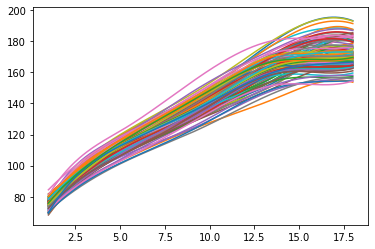

In [3]:
dataset = fetch_growth()
fd = dataset['data']
y = dataset['target']

basis = skfda.representation.basis.BSpline(n_basis=7)
basisfd = fd.to_basis(basis)

basisfd.plot()
pyplot.show()

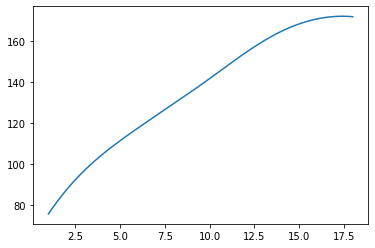

In [4]:
# obtain the mean function of the dataset for representation purposes
meanfd = basisfd.mean()

meanfd.plot()
pyplot.show()


Obtain first two principal components, observe that those two are very similar to the principal components obtained in the discretized analysis, only smoother due to the basis representation

In [13]:
fpca = FPCABasis()
basis = skfda.representation.basis.Fourier(n_basis=1)
fd = FDataBasis(basis, [[0.9], [0.7]])

fpca.fit(fd)

AttributeError: The sample size should be bigger than the number of components

In [5]:
fpca = FPCABasis(9)
fpca.fit(basisfd)
print(fpca.component_values)
fpca.components.plot()
print(fpca.components)
pyplot.show()

AttributeError: The number of components should be smaller than n_basis of target principalcomponents' basis.

[5.57673847e+02 9.20070385e+01 2.01867145e+01 7.12109835e+00
 3.00574871e+00 1.33090387e+00 4.02432202e-01]
FDataBasis(
    _basis=BSpline(domain_range=[[ 1. 18.]], n_basis=7, order=4, knots=[1.0, 5.25, 9.5, 13.75, 18.0]),
    coefficients=[[-0.08496812 -0.11289386 -0.16694664 -0.21276737 -0.31757592 -0.35642335
      -0.33056519]
     [ 0.00738993 -0.06897138 -0.10686955 -0.18635685 -0.47864279  0.78178633
       0.42255908]])


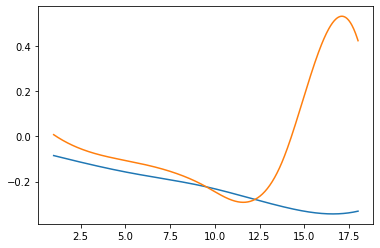

In [9]:
fpca = FPCABasis(2)
fpca.fit(basisfd)
print(fpca.component_values)
fpca.components.plot()
print(fpca.components)
pyplot.show()

In [12]:
print(fpca.transform(basisfd))

[[-5.30720261e+01 -1.20900812e+01]
 [ 5.93932831e+00 -8.13503289e+00]
 [ 1.87359068e+01 -1.29753453e+01]
 [-1.02271668e+01 -1.41114219e+01]
 [ 1.78816044e+01 -1.61153507e+01]
 [ 8.76982056e+00 -9.64548625e+00]
 [ 1.51595101e+01 -7.48338120e+00]
 [-2.57711354e+01 -1.02616428e+01]
 [ 1.88410831e+01 -1.11580232e+01]
 [-4.64293496e+01 -2.83317044e+00]
 [-4.31966291e+00 -1.10533867e+01]
 [-3.03723709e+01 -1.34939115e+01]
 [-1.10945917e+01 -1.28105622e+01]
 [-3.09084367e+01 -7.52073071e+00]
 [-2.34011972e+01 -2.11592349e-01]
 [-2.70364964e+01 -6.22251055e+00]
 [-1.77541148e+01 -1.10945725e+01]
 [-2.08566166e+01  1.20259305e+00]
 [ 4.67719637e+00 -9.63524550e+00]
 [-4.76931190e+00 -8.60596519e+00]
 [ 1.37391612e+01 -1.05089784e+01]
 [ 9.29873449e+00 -1.17272101e+01]
 [ 2.45160232e+00 -1.48677580e+01]
 [ 1.67240989e+01 -1.02844853e+01]
 [ 8.27541495e+00 -1.17247480e+01]
 [-7.15374915e+00 -1.35331741e+01]
 [-1.03861652e+01 -4.22348685e+00]
 [ 2.29727946e+01 -9.98599278e+00]
 [-5.91216298e+01 -6

Fetch the dataset again as the module modified the original data and centers the original data.
The mean function is distorted after such transformation

In [13]:
dataset = fetch_growth()
fd = dataset['data']
basis = skfda.representation.basis.BSpline(n_basis=7)
basisfd = fd.to_basis(basis)

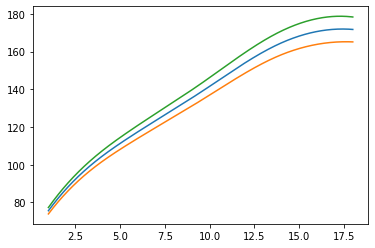

In [14]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 20 * fpca.components.coefficients[0, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 20 * fpca.components.coefficients[0, :]])

meanfd.plot()
pyplot.show()

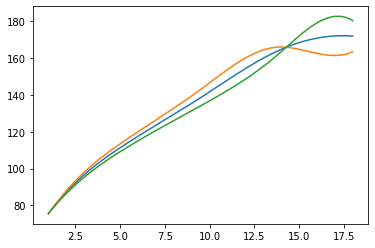

In [15]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 20 * fpca.components.coefficients[1, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 20 * fpca.components.coefficients[1, :]])

meanfd.plot()
pyplot.show()

## Canadian Weather Study 

In [3]:
fd_data = fetch_weather_temp_only()

In [19]:
print(fd_data)

Data set:    [[[ -3.6]
  [ -3.1]
  [ -3.4]
  ...
  [ -3.2]
  [ -2.8]
  [ -4.2]]

 [[ -4.4]
  [ -4.2]
  [ -5.3]
  ...
  [ -3.6]
  [ -4.9]
  [ -5.7]]

 [[ -3.8]
  [ -3.5]
  [ -4.6]
  ...
  [ -3.4]
  [ -3.3]
  [ -4.8]]

 ...

 [[-23.3]
  [-24. ]
  [-24.4]
  ...
  [-23.5]
  [-23.9]
  [-24.5]]

 [[-26.3]
  [-27.1]
  [-27.8]
  ...
  [-25.7]
  [-24. ]
  [-24.8]]

 [[-30.7]
  [-30.6]
  [-31.4]
  ...
  [-29. ]
  [-29.4]
  [-30.5]]]
sample_points:    [array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100

In [10]:
fd_data.domain_range = [[0.5, 364.5]]

AttributeError: can't set attribute

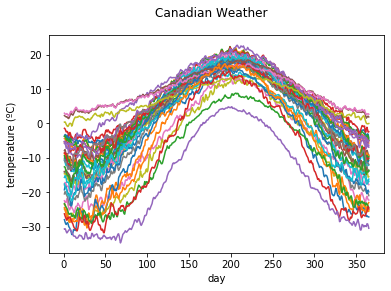

In [33]:
fd_data = fetch_weather_temp_only()
fd_data.plot()
pyplot.show()

In [4]:
fd_data = FDataGrid(np.squeeze(fd_data.data_matrix), np.arange(0.5, 365, 1))
print(fd_data.dim_domain)

1


In [7]:
print(fd_data)

Data set:    [[[ -3.6]
  [ -3.1]
  [ -3.4]
  ...
  [ -3.2]
  [ -2.8]
  [ -4.2]]

 [[ -4.4]
  [ -4.2]
  [ -5.3]
  ...
  [ -3.6]
  [ -4.9]
  [ -5.7]]

 [[ -3.8]
  [ -3.5]
  [ -4.6]
  ...
  [ -3.4]
  [ -3.3]
  [ -4.8]]

 ...

 [[-23.3]
  [-24. ]
  [-24.4]
  ...
  [-23.5]
  [-23.9]
  [-24.5]]

 [[-26.3]
  [-27.1]
  [-27.8]
  ...
  [-25.7]
  [-24. ]
  [-24.8]]

 [[-30.7]
  [-30.6]
  [-31.4]
  ...
  [-29. ]
  [-29.4]
  [-30.5]]]
sample_points:    [  0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.
   6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5  12.
  12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.
  18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5  24.
  24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5  30.
  30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5  36.
  36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5  42.
  42.5  43.   43.5  44.   44.5  45.   45.5  46.   4

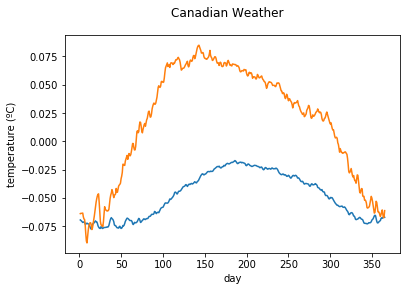

In [18]:
fpca_discretized = FPCADiscretized(2)
fpca_discretized.fit(fd_data)
fpca_discretized.components.plot()
pyplot.show()

In [30]:
fd_data = fetch_weather_temp_only()
print(fd_data.sample_points)

[array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 1

In [31]:
range(0,3)

range(0, 3)

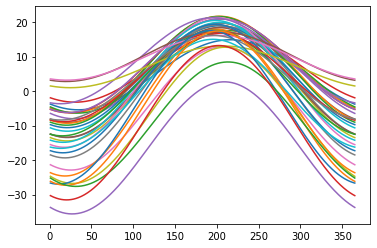

In [9]:
fd_data = fetch_weather_temp_only()
# fd_data = FDataGrid(np.squeeze(fd_data.data_matrix), np.arange(0.5, 365, 1))
basis = skfda.representation.basis.Fourier(n_basis=3)
fd_basis = fd_data.to_basis(basis)

fd_basis.plot()
pyplot.show()

In [10]:
print(fd_basis)

FDataBasis(
    _basis=Fourier(domain_range=[[  1 365]], n_basis=3, period=364),
    coefficients=[[  89.92195965  -76.6540343  -113.56527848]
     [ 117.91048476  -78.29623089 -147.99771918]
     [ 105.64601919  -87.48751862 -135.23786638]
     [ 130.41525077  -68.03400727 -117.56196272]
     [ 100.44054184  -86.56110769 -157.01740098]
     [ 101.11363823  -73.29578447 -179.87563595]
     [ -95.66841575 -101.81332746 -218.82950503]
     [  59.96125842  -80.13360204 -209.51804361]
     [  43.6817805   -79.47391326 -211.60839615]
     [  78.63054053  -76.70039418 -198.32081877]
     [  79.32089798  -70.62376518 -186.38162541]
     [ 117.7284124   -74.49860223 -195.51372983]
     [ 111.67543758  -72.96278011 -199.5791436 ]
     [ 139.29219563  -71.22916468 -169.13804592]
     [ 140.18018698  -70.14769133 -168.99937059]
     [  47.74788751  -74.91102958 -200.75128544]
     [  48.12299843  -76.44333055 -242.23286231]
     [  -1.92277569  -81.08021473 -247.06920225]
     [-134.27412634 -122

In [26]:
print(fd_data.dim_domain)

365


FDataBasis(
    _basis=Fourier(domain_range=[[  0.5 364.5]], n_basis=9, period=364.0),
    coefficients=[[-0.92321326 -0.13998864 -0.35548708 -0.00939677  0.02399664  0.02906587
       0.00253204  0.01019684  0.0094896 ]
     [-0.33139612 -0.04288814  0.8923411   0.17120705  0.24317564  0.03754241
       0.03855143 -0.02475171  0.01049033]
     [-0.13762736  0.91089487 -0.00737022  0.26476734 -0.21910974  0.17406323
       0.02554942  0.00108415  0.0470334 ]
     [ 0.1248126   0.01012829 -0.26644643  0.42618909  0.75225281  0.25983432
       0.20726074 -0.17024835  0.16232288]])
[15086.27662761  1438.98606096   314.69304555    85.04287004]


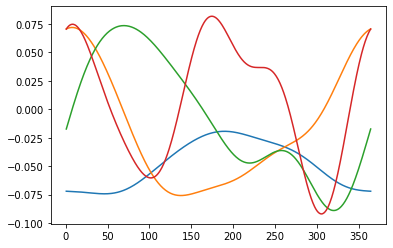

In [36]:
fd_data = fetch_weather_temp_only()
# fd_data = FDataGrid(np.squeeze(fd_data.data_matrix), np.arange(0.5, 365, 1))
basis = skfda.representation.basis.Fourier(n_basis=3)
fd_basis = fd_data.to_basis(basis)
fpca = FPCABasis(4)
fpca.fit(fd_basis)
fpca.components.plot()
print(fpca.components)
print(fpca.component_values)
pyplot.show()

In [12]:
(1.363 - 1.429 )/1.429 


-0.04618614415675301

In [ ]:
ramsay implementation without penalization

PC1  0.9231551  0.13649663  0.35694509 0.0092012 -0.0244525 -0.02923873 -0.003566887 -0.009654571 -0.010006303
PC2 -0.3315211 -0.05086430  0.89218521 0.1669182  0.2453900  0.03548997  0.037938051 -0.025777507  0.008416904
PC3 -0.1379108  0.91250892  0.00142045 0.2657423 -0.2146497  0.16833314  0.031509179 -0.006768189  0.047306718
PC4  0.1247078  0.01579953 -0.26498643 0.4118705  0.7617679  0.24922635  0.213305250 -0.180158701  0.154863926

values 15164.718872  1446.091968   314.361310    85.508572

Fetch the dataset again as the module modified the original data and centers the original data.
The mean function is distorted after such transformation

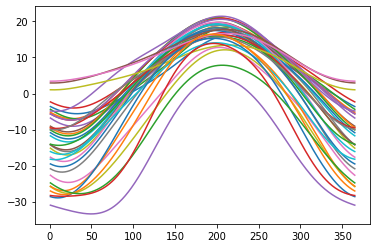

In [20]:
fd_data = fetch_weather_temp_only()

basis = skfda.representation.basis.Fourier(n_basis=7)
basisfd = fd_data.to_basis(basis)
basisfd.plot()
pyplot.show()

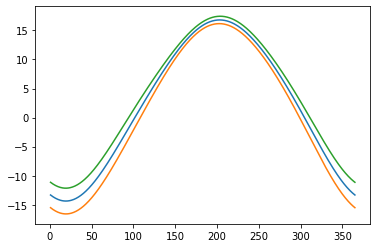

In [21]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 30 * fpca.components.coefficients[0, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 30 * fpca.components.coefficients[0, :]])

meanfd.plot()
pyplot.show()

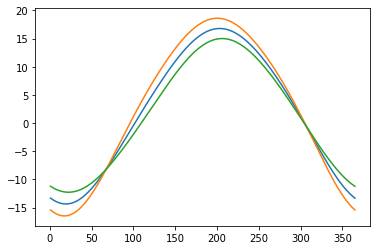

In [22]:
meanfd = basisfd.mean()
meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] + 30 * fpca.components.coefficients[1, :]])

meanfd.coefficients = np.vstack([meanfd.coefficients,
                                  meanfd.coefficients[0, :] - 30 * fpca.components.coefficients[1, :]])

meanfd.plot()
pyplot.show()